# Introduction

## Visibility Analysis

Nutpy incorporates tools to analyse how a satellite scans the sky and how much time observes each point. This could be used, for example, to study where would be more suitable to locate an ancillary satellite to help calibrating the main satellite.

Nutpy is intended for satellites that follow a spin/precession scanning strategy (see the scheme shown below). Such strategy is defined by 4 parameters, the scan strategy parameters (SSP): $\alpha$, $\beta$, $T_{spin}$ and $T_{prec}$.

A satellite that follows this type of strategy will spin around its main axis (spin axis) with a time period of $T_{spin}$. Simultaneously, the spin axis, which is separated an angle $\alpha$ from the precession axis, rotates around it with a time period of $T_{prec}$.

In space telescopes located at $L_2$ for deep space observation, the precession axis should point opposite to the Sun direction. The instrument line-of-sight (LoS) is separated an angle $\beta$ from the spin axis and has a conic FOV with a half-angle of $\delta$. 

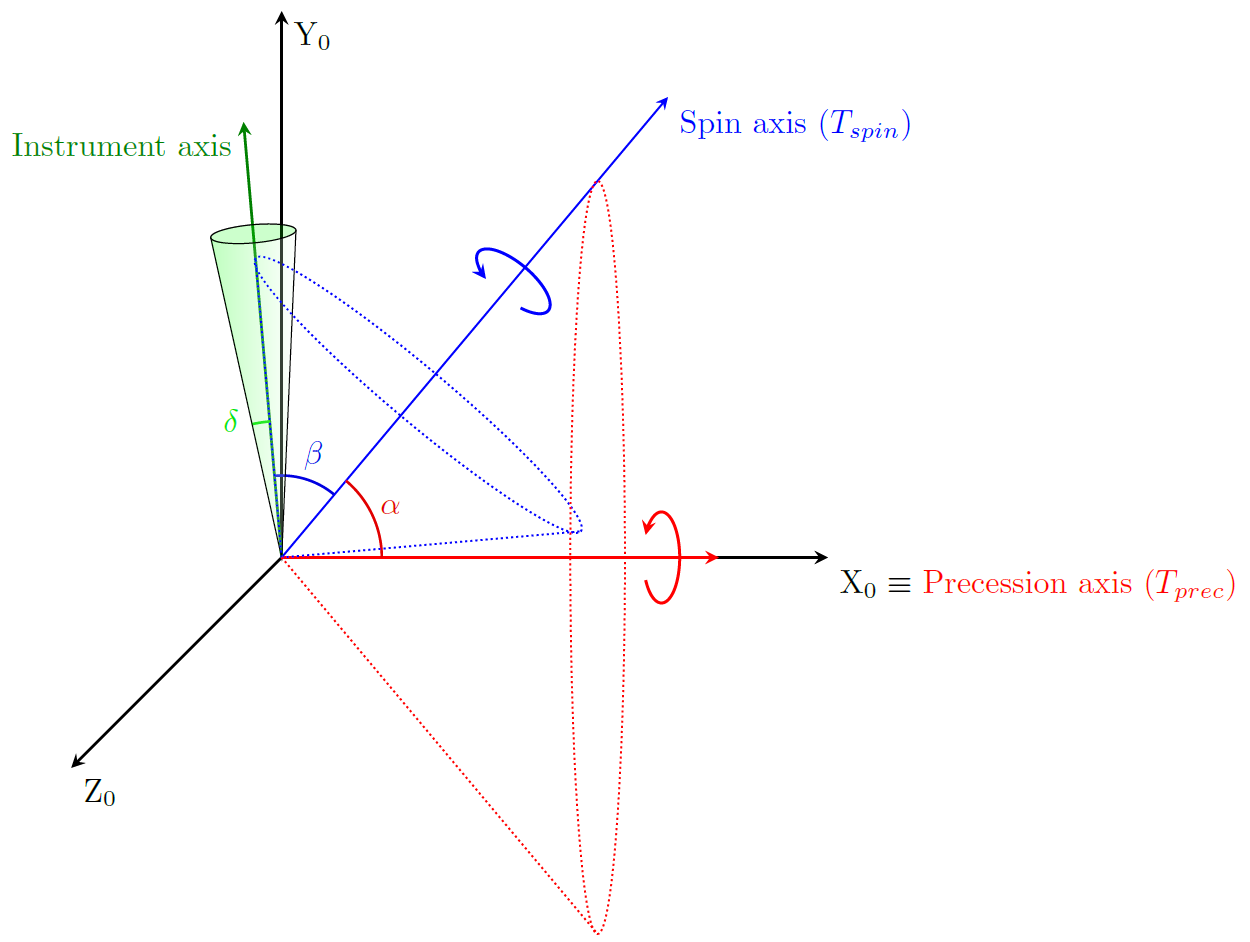

The rotation of the main satellite is intended to follow a defined strategy to scan the sky according to its scientific objectives. The extent of the space that is seen by the instrument at a given moment is called Field of View (FOV). A given point in the sky is only seen by the instrument while it is whitin the intrument FOV. Such event will be called here an `access' and it can be characterized by its frequency, duration and how effective it can be for calibration. These features depend mainly on the sky point position and the scan strategy followed by the satellite. In order to quantify how well a sky point is seen by the instrument, a set of parameters have been defined based on the access features: total access time (TAT), mean access time (MAT), and maximum accesss time (MAX).

## Nutpy

Nutpy incorporates the algorithms that allow to compute analytically the aforementioned quantities (TAT, MAT, and MAX) for all the points in the sky. These methods can be called through the global class of Nutpy, called **Nut**. This class includes multiple tools and parameters to perform high level operations, which are mainly to compute and plot the quantities.

First, let's create an instance of Nut, including the scan strategy parameters (SSP), instrument FOV, and the duration of the simulation ($T_{sim}$)

In [3]:
from nutpy.mission import Nut

In [4]:
alpha = 45  # [deg]
beta = 50  # [deg]
Tspin = 10  # [min]
Tprec = 90  # [min]

delta_instrument = 7.5  # [deg]

Tsim = 5*3600  # [s]

SSP = [alpha, beta, Tspin, Tprec]

LB = Nut(SSP=SSP, delta_instrument=delta_instrument, Tsim=Tsim)


Now, we can ask Nut to compute the total access time and plot it. The method will return the figure and the map data.

mollweide


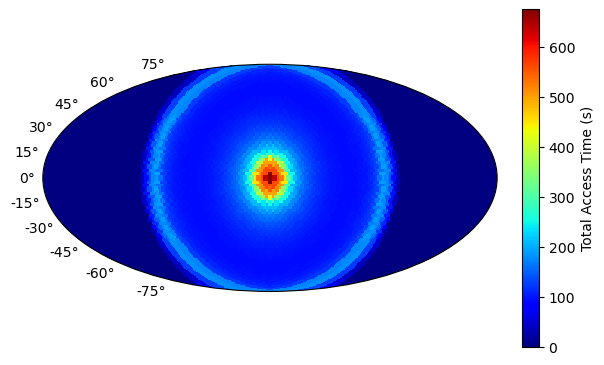

In [5]:
fig_tat_eye, data_tat_eye = LB.analytical_map(quantity="TAT")

The figure respresente the mollweide projection of celestial sphere (the whole sky) and its colored according to the total time that each point is seen. As can be observed in the figure, the results are symetric around the center, which coincides with the precesion axis. Hence, we can be just represent how this quantity varies as we separate from such axis ($\varphi$ angle).

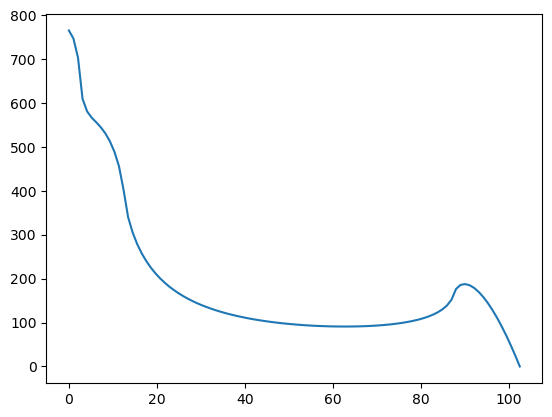

In [6]:
fig_tat_profile, data_tat_profile = LB.analytical_profile(quantity="TAT")

In reality, the analytical methods used by nutpy rest on the assumptions that the results will be axial-symmetric, so when you ask nutpy to plot the map, it computes first the profile and then uses it to obtain the map.

The other quantities can be also obtained similarly.

mollweide


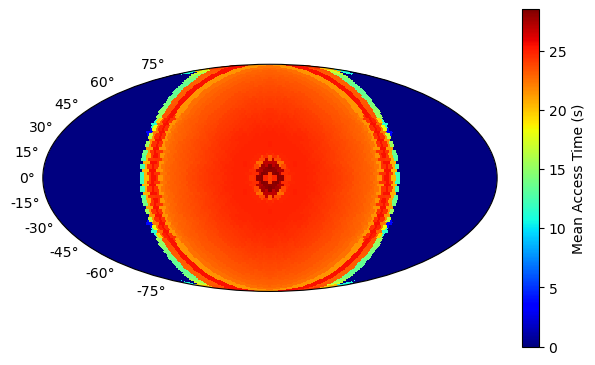

In [7]:
fig_mat_eye, data_mat_eye = LB.analytical_map(quantity="MAT")

mollweide


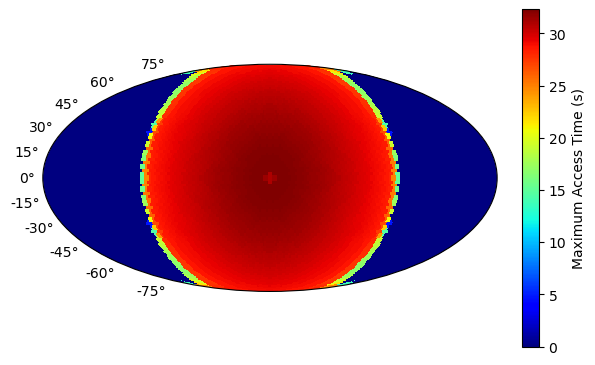

In [8]:
fig_max_eye, data_max_eye = LB.analytical_map(quantity="MAX")